In [10]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

# GLOBALS
task_1_title_str = ['0', '30', '45'] # Degrees
phi_l = [0, np.pi/6, np.pi/4]

In [20]:
import sympy as sp

# Define the symbolic variables
phi = sp.symbols('phi')
theta = sp.symbols('theta')

# Define Matrix A as a 2 by 1 matrix
A = sp.Matrix([[0], [1]])

# Define the expressions for the elements of Matrix B
elem11 = (1 + sp.I*sp.cos(2*phi))
elem12 = -sp.I*sp.sin(2*phi)
elem21 = -sp.I*sp.sin(2*phi)
elem22 = (1 - sp.I*sp.cos(2*phi))

# Define the constant 1/sqrt(2)
sqrt2 = sp.sqrt(2)

# Waveplate
B = (1/sqrt2) * sp.Matrix([[elem11, elem12], [elem21, elem22]])

# Analyzer
C = sp.Matrix([[sp.sin(theta)**2, sp.sin(theta)*sp.cos(theta)], [sp.sin(theta)*sp.cos(theta), sp.cos(theta)**2]])

phi_value = 0
theta_value = theta

# Multiply the matrices
BA = B * A  # First multiply B and A
CBA = C * BA  # Then multiply C and the result of BA
CBA_substituted = CBA.subs({phi: phi_value, theta: theta_value})

# Display the result in LaTeX
latex_result = sp.latex(CBA)

print("Matrix A:")
sp.pprint(A)
print("\nMatrix B:")
sp.pprint(B)
print("\nMatrix C:")
sp.pprint(C)
print("\nResult of C * B * A in LaTeX:")
latex_result = sp.latex(CBA_substituted)
latex_display = "$$" + latex_result + "$$"
dy(Lx(latex_display))

Matrix A:
⎡0⎤
⎢ ⎥
⎣1⎦

Matrix B:
⎡√2⋅(ⅈ⋅cos(2⋅φ) + 1)    -√2⋅ⅈ⋅sin(2⋅φ)    ⎤
⎢───────────────────    ───────────────   ⎥
⎢         2                    2          ⎥
⎢                                         ⎥
⎢  -√2⋅ⅈ⋅sin(2⋅φ)     √2⋅(-ⅈ⋅cos(2⋅φ) + 1)⎥
⎢  ───────────────    ────────────────────⎥
⎣         2                    2          ⎦

Matrix C:
⎡      2                     ⎤
⎢   sin (θ)     sin(θ)⋅cos(θ)⎥
⎢                            ⎥
⎢                     2      ⎥
⎣sin(θ)⋅cos(θ)     cos (θ)   ⎦

Result of C * B * A in LaTeX:


<IPython.core.display.Latex object>

In [19]:
norm_squared = sp.simplify(CBA_substituted.norm()**2)

# Convert the simplified expression to a LaTeX string
latex_norm_squared = "$$" + sp.latex(norm_squared) + "$$"

# Print the simplified expression in LaTeX format
print("Simplified norm squared of the vector in LaTeX:")
dy(Lx(latex_norm_squared))

Simplified norm squared of the vector in LaTeX:


<IPython.core.display.Latex object>

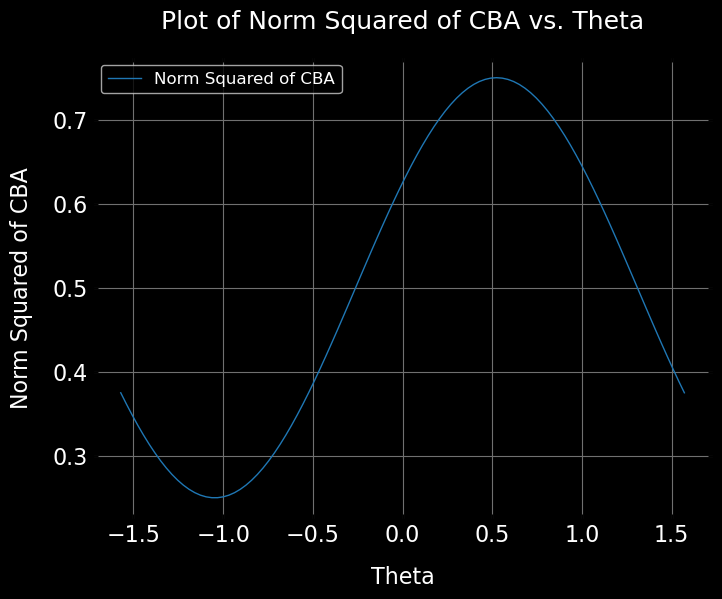

Theta: -1.5707963267948966 | Norm Squared: 0.375000000000000
Theta: -1.5390630676677268 | Norm Squared: 0.361519984033472
Theta: -1.5073298085405573 | Norm Squared: 0.348597578215583
Theta: -1.4755965494133876 | Norm Squared: 0.336284816513679
Theta: -1.443863290286218 | Norm Squared: 0.324631278073420
Theta: -1.4121300311590483 | Norm Squared: 0.313683887581061
Theta: -1.3803967720318788 | Norm Squared: 0.303486726314303
Theta: -1.348663512904709 | Norm Squared: 0.294080854642542
Theta: -1.3169302537775396 | Norm Squared: 0.285504146691256
Theta: -1.2851969946503699 | Norm Squared: 0.277791137836269
Theta: -1.2534637355232003 | Norm Squared: 0.270972885641983
Theta: -1.2217304763960306 | Norm Squared: 0.265076844803523
Theta: -1.189997217268861 | Norm Squared: 0.260126756596376
Theta: -1.1582639581416914 | Norm Squared: 0.256142553278648
Theta: -1.1265306990145216 | Norm Squared: 0.253140277830901
Theta: -1.0947974398873521 | Norm Squared: 0.251132019356729
Theta: -1.0630641807601826 

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbolic variables
phi = sp.symbols('phi')
theta = sp.symbols('theta')

# Define Matrix A as a 2 by 1 matrix
A = sp.Matrix([[0], [1]])

# Define the expressions for the elements of Matrix B
elem11 = (1 + sp.I*sp.cos(2*phi))
elem12 = -sp.I*sp.sin(2*phi)
elem21 = -sp.I*sp.sin(2*phi)
elem22 = (1 - sp.I*sp.cos(2*phi))

# Define the constant 1/sqrt(2)
sqrt2 = sp.sqrt(2)

# Define Matrix B (Waveplate)
B = (1/sqrt2) * sp.Matrix([[elem11, elem12], [elem21, elem22]])

# Define Matrix C (Analyzer)
C = sp.Matrix([[sp.sin(theta)**2, sp.sin(theta)*sp.cos(theta)], [sp.sin(theta)*sp.cos(theta), sp.cos(theta)**2]])

phi_value = np.pi/6

# List of theta values
theta_values = np.linspace(-np.pi/2, np.pi/2, 100)

# List to store computed norm squared values of CBA
norm_squared_values = []

# Compute norm squared of CBA for each theta value
for theta_value in theta_values:
    # Substitute the current theta value into C
    C_substituted = C.subs(theta, theta_value)
    # Multiply the matrices
    BA = B * A  # First multiply B and A
    CBA = C_substituted * BA  # Then multiply C_substituted and the result of BA
    # Substitute the value of phi
    CBA_substituted = CBA.subs(phi, phi_value)
    # Compute the norm squared of CBA and append the value to the list
    norm_squared_values.append(sp.simplify(CBA_substituted.norm()**2))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(theta_values, norm_squared_values, label='Norm Squared of CBA')
plt.xlabel('Theta')
plt.ylabel('Norm Squared of CBA')
plt.title('Plot of Norm Squared of CBA vs. Theta')
plt.legend()
plt.grid(True)
plt.show()

for theta_val, norm_squared_val in zip(theta_values, norm_squared_values):
    print("Theta:", theta_val, "| Norm Squared:", norm_squared_val)

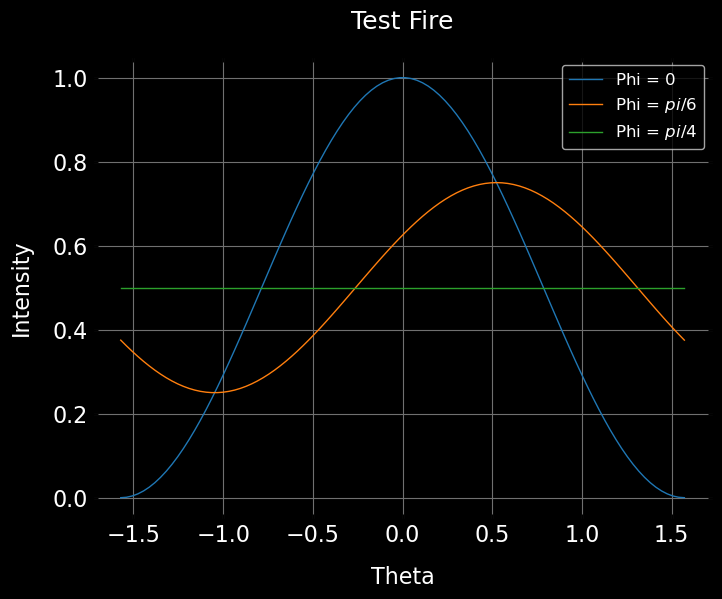


Phi: 0
Theta: -1.5707963267948966 | Norm Squared: 3.74939945665464e-33
Theta: -1.5390630676677268 | Norm Squared: 0.00100666176405781
Theta: -1.5073298085405573 | Norm Squared: 0.00402259358460236
Theta: -1.4755965494133876 | Norm Squared: 0.00903565136864668
Theta: -1.443863290286218 | Norm Squared: 0.0160256493018219
Theta: -1.4121300311590483 | Norm Squared: 0.0249644411295274
Theta: -1.3803967720318788 | Norm Squared: 0.0358160334919637
Theta: -1.348663512904709 | Norm Squared: 0.0485367308566894
Theta: -1.3169302537775396 | Norm Squared: 0.0630753114651075
Theta: -1.2851969946503699 | Norm Squared: 0.0793732335844095
Theta: -1.2534637355232003 | Norm Squared: 0.0973648712344707
Theta: -1.2217304763960306 | Norm Squared: 0.116977778440511
Theta: -1.189997217268861 | Norm Squared: 0.138132980947465
Theta: -1.1582639581416914 | Norm Squared: 0.160745294221434
Theta: -1.1265306990145216 | Norm Squared: 0.184723666457739
Theta: -1.0947974398873521 | Norm Squared: 0.209971545214401
The

In [14]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

# Define the symbolic variables
phi = sp.symbols('phi')
theta = sp.symbols('theta')
pi = sp.pi

# Define Matrix A as a 2 by 1 matrix
A = sp.Matrix([[0], [1]])

# Define the expressions for the elements of Matrix B
elem11 = (1 + sp.I*sp.cos(2*phi))
elem12 = -sp.I*sp.sin(2*phi)
elem21 = -sp.I*sp.sin(2*phi)
elem22 = (1 - sp.I*sp.cos(2*phi))

# Define the constant 1/sqrt(2)
sqrt2 = sp.sqrt(2)

# Define Matrix B (Waveplate)
B = (1/sqrt2) * sp.Matrix([[elem11, elem12], [elem21, elem22]])

# Define Matrix C (Analyzer)
C = sp.Matrix([[sp.sin(theta)**2, sp.sin(theta)*sp.cos(theta)], [sp.sin(theta)*sp.cos(theta), sp.cos(theta)**2]])

# List of phi values
phi_values = [0, pi/6, pi/4]

# List of theta values
theta_values = np.linspace(-np.pi/2, np.pi/2, 100)

# Dictionary to store computed norm squared values for each phi
norm_squared_values = {}

# Compute norm squared of CBA for each phi value
for phi_val in phi_values:
    norm_squared_values[phi_val] = []
    for theta_value in theta_values:
        # Substitute the current theta value into C
        C_substituted = C.subs(theta, theta_value)
        # Multiply the matrices
        BA = B * A  # First multiply B and A
        CBA = C_substituted * BA  # Then multiply C_substituted and the result of BA
        # Substitute the value of phi
        CBA_substituted = CBA.subs(phi, phi_val)
        # Compute the norm squared of CBA and append the value to the list
        norm_squared_values[phi_val].append(sp.simplify(CBA_substituted.norm()**2))

plt.figure(figsize=(8, 6))
for i, (phi_val, norm_squared_vals) in enumerate(norm_squared_values.items()):
    plt.plot(theta_values, norm_squared_vals, label=f'Phi = ${phi_val}$')
plt.xlabel('Theta')
plt.ylabel('Intensity')
plt.title('Test Fire')
plt.legend()
plt.grid(True)
plt.show()


# Print computed norm squared values
for phi_val, norm_squared_vals in norm_squared_values.items():
    print(f"\nPhi: {phi_val}")
    for theta_val, norm_squared_val in zip(theta_values, norm_squared_vals):
        print("Theta:", theta_val, "| Norm Squared:", norm_squared_val)
